# Inaugural Project

**Table of contents**<a id='toc0_'></a>    
- 1. [Imports](#toc1_)    
- 2. [Model class](#toc2_)    
- 3. [Exercises](#toc3_)
	- 3.1 [Question 1 - Edgeworth Box](#toc3_1_) 
	- 3.2 [Question 2 - Market Clearing Error](#toc3_2_)
	- 3.3 [Question 3 - Market clearing price](#toc3_3_)
	- 3.4a [Question 4a - Allocation when p1 is in P1](#toc3_4_)
	- 3.4b [Question 4b - Allocation when p1 > 0](#toc3_5_)
	- 3.5a [Question 5a - allocation if choice set is in C](#toc3_6_)
	- 3.5b [Question 5b - Question 5b - allocation if no further restrictions](#toc3_7_)
	- 3.6a [Question 6a - Social planner](#toc3_8_)
	- 3.6b [Question 6b - Illustration of allocations](#toc3_9_)
	- 3.7 [Question 7 - Random set of 50 elements](#toc3_10_)
	- 3.8 [Question 8 - Edgeworth box for the 50 elements](#toc3_11_)

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## 1. <a id='toc2_'></a>[Imports](#toc0_)

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.optimize import minimize_scalar
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 2. <a id='toc2_'></a>[Model class](#toc0_)

In [2]:
from inauguralproject import InauguralProjectClass

## 3. <a id='toc3_'></a>[Exercises](#toc0_)

### 3.1. <a id='toc3_1_'></a>[Question 1 - Edgeworth Box](#toc0_)

In [3]:
model = InauguralProjectClass()

We have found a set of code online providing us with the ability to swiftly draw an Edgeworth Box. The relevant code has been found here:  
  author = Maxim Litvak  
  title = pyEdgeworthBox: A Python Library for Edgeworth Box Plots  
  year = 2024 (Year of the version or first release)  
  version = 0.3.3  
  url = https://github.com/maxlit/pyEdgeworthBox  

We make use of our py-file as input to draw the Edgeworth box. We put in the utility functions of the two consumers and their initial endowment sets. The box is then made.

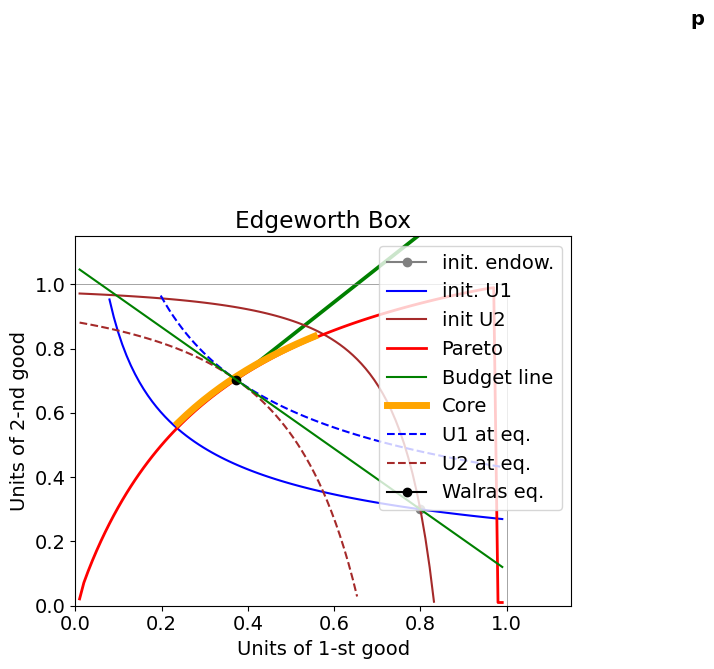

In [4]:
%matplotlib inline
import pyEdgeworthBox as eb
EB=eb.EdgeBox(  u1 = model.utility_A
              , u2 = model.utility_B
              , IE1 = [model.par.w1A,model.par.w2A]
              , IE2 = [model.par.w1B,model.par.w2B])
EB.plot()

The consumers initial endowment sets are defined by the grey point in the bottom right corner (in the legend saying "init. endow."). The Pareto improvements relative to this point are endowments sets lying above each players initial indifference curves. The consumers initial endowment curves are respectively regular blue and red lines denoted as "init. U1" and "init. U2" in the graph. Hence, the pairs asked for are in the oval space in between these two graphs.

(Disclaimer: the graph has a lot of other information that is not being asked for as of now. It will be used later and explained later in the assignment.)

### 3.2. <a id='toc3_2_'></a>[Question 2 - Market clearing error](#toc0_)

Calculating the error in the market clearing condition for p1 in the set P1. 
First we define the range P1 and set N=75 after which we call a function, which we have defined in the py-file, that calculates the market errors. It does so by iterating over each p1 value in P1. We do that now, and then plot the errors.

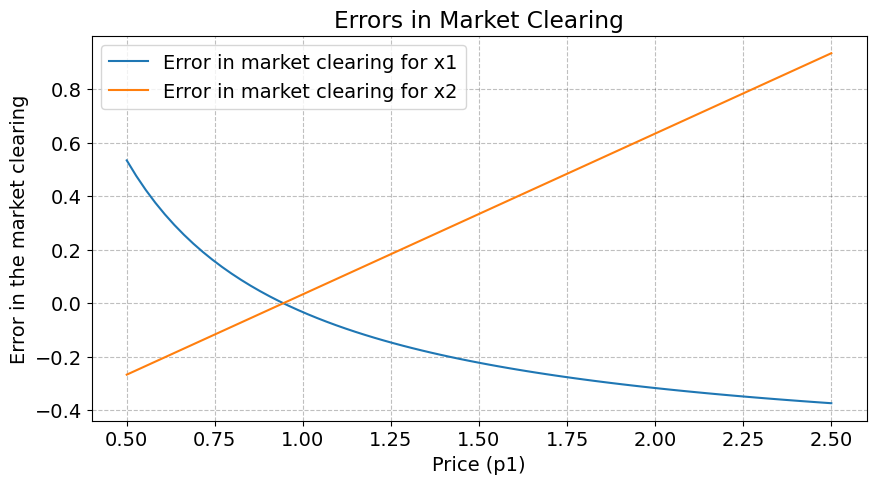

In [5]:
# Calculate P1
P1 = np.linspace(0.5, 2.5, num=75)

# Calculate errors using the new method
error_1, error_2 = model.calculate_market_clearing_errors(P1)

# Plotting errors
plt.figure(figsize=(10, 5))
plt.plot(P1, error_1, label='Error in market clearing for x1')
plt.plot(P1, error_2, label='Error in market clearing for x2')
plt.xlabel('Price (p1)')
plt.ylabel('Error in the market clearing')
plt.title('Errors in Market Clearing')
plt.grid(True)
plt.legend()
# Show plot
plt.show()


The figure shows, that the market clearing price is somewhere around p1=0.9, as it is where both errors are closest to zero. In Q3 we calculate the market clearing price.

### 3.3. <a id='toc3_3_'></a>[Question 3 - Market clearing price](#toc0_)

We have iterated over all possible values for p1 in P1. We now find the smallest error in the list. The corresponding p1-value to the smallest error will also be the market clearing price. We thus have:

In [6]:
# Calculate P1
P1 = np.linspace(0.5, 2.5, num=75)

# Find the exact market clearing price
market_clearing_price, min_error = model.market_clearing_price(P1)

print(f"Market clearing price: {market_clearing_price:.3f}")
print(f"Minimum error: {min_error:.3f}")

Market clearing price: 0.944
Minimum error: 0.000


With the epsilon values being 0, we now that the price is right

### 3.4a. <a id='toc3_4_'></a>[Question 4a - Allocation when p1 is in P1](#toc0_)

We can use the same code already made to find the allocation if only prices in P1 can be choosen. We do so by simply calling the model build in the py-file and plugging the in the market clearing price. We only find demand for good 1, because due to Walras law, we only need to find the demand for good 1.

In [ ]:
### GAMMEL KODE:###
x1A_4a = model.demand_A(market_clearing_price)
x1B_4a = model.demand_B(market_clearing_price)

print(f"Allocation of good 1 to consumer A: {x1A_4a:.3f}")
print(f"Allocation of good 1 to consumer B: {x1B_4a:.3f}")

We observe that this allocation sums to 1 and the calculation must be right

In [24]:
# 2. fundne kode brugt (Måske den rigtige)
# Calculate P1
P1 = np.linspace(0.5, 2.5, num=75)

# Find the allocation maximizing consumer A's utility
max_utility_price, max_utility_allocation, max_utility = model.max_utility_A_allocation(P1)

print(f"Price maximizing consumer A's utility: {max_utility_price:.3f}")
print(f"Allocation maximizing consumer A's utility: {max_utility_allocation}")
print(f"Maximum utility for consumer A: {max_utility:.3f}")

Price maximizing consumer A's utility: 1.899
Allocation maximizing consumer A's utility: (0.6209680844926924, 0.6400435871363097)
Maximum utility for consumer A: 0.634


In [16]:
## 1. fundne kode brugt (nok forkert): 

# Define the range of prices to evaluate
num_prices = 10
price_range = np.linspace(0.5, 2.5, num_prices)

# Iterate over each price in the price range
for i, price in enumerate(price_range):
    # Calculate allocation for consumer A at the current price
    x1A, x2A = model.demand_A(price)
    
    # Calculate allocation for consumer B
    x1B = 1 - x1A
    x2B = 1 - x2A
    
    # Calculate excess demand
    eps1, eps2 = model.check_market_clearing(price)
    
    # Calculate utility for consumer A
    utility_A = model.utility_A(x1A, x2A)
    
    # Print results
    print(f'Price = {price:.2f} -> Allocation for consumer A: x1A = {x1A:.3f}, x2A = {x2A:.3f}, Utility for consumer A = {utility_A:.3f}, Excess demand = {excess_demand[i]:.8f}')


Price = 0.50 -> Allocation for consumer A: x1A = 0.467, x2A = 0.467, Utility for consumer A = 0.467, Excess demand = 0.26666667
Price = 0.72 -> Allocation for consumer A: x1A = 0.405, x2A = 0.585, Utility for consumer A = 0.518, Excess demand = 0.05128205
Price = 0.94 -> Allocation for consumer A: x1A = 0.373, x2A = 0.704, Utility for consumer A = 0.569, Excess demand = 0.00000000
Price = 1.17 -> Allocation for consumer A: x1A = 0.352, x2A = 0.822, Utility for consumer A = 0.620, Excess demand = 0.01904762
Price = 1.39 -> Allocation for consumer A: x1A = 0.339, x2A = 0.941, Utility for consumer A = 0.669, Excess demand = 0.07466667
Price = 1.61 -> Allocation for consumer A: x1A = 0.329, x2A = 1.059, Utility for consumer A = 0.717, Excess demand = 0.15172414
Price = 1.83 -> Allocation for consumer A: x1A = 0.321, x2A = 1.178, Utility for consumer A = 0.764, Excess demand = 0.24242424
Price = 2.06 -> Allocation for consumer A: x1A = 0.315, x2A = 1.296, Utility for consumer A = 0.809, Exc

As we see. The price that maximizes the utility for A is the highest price p1=2.5.  
We can visualize it in a graph below.

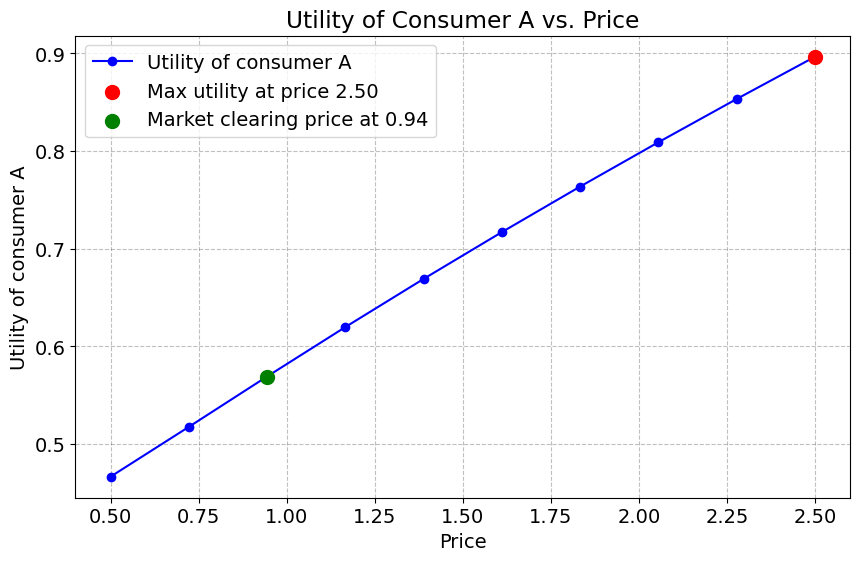

In [17]:
## Til 1. fundne kode, nok forkert

# Define the range of prices to evaluate
num_prices = 10
price_range = np.linspace(0.5, 2.5, num_prices)

# Initialize arrays to store results
allocation_x1A = np.zeros(num_prices)
allocation_x2A = np.zeros(num_prices)
excess_demand = np.zeros(num_prices)
utilities = np.zeros(num_prices)  # Define utilities array

# Iterate over each price in the price range
for i, price in enumerate(price_range):
    # Calculate allocation for consumer A at the current price
    x1A, x2A = model.demand_A(price)
    
    # Calculate allocation for consumer B
    x1B = 1 - x1A
    x2B = 1 - x2A
    
    # Calculate excess demand
    eps1, eps2 = model.check_market_clearing(price)
    
    # Calculate utility for consumer A
    utility_A = model.utility_A(x1A, x2A)
    
    # Store results
    allocation_x1A[i] = x1A
    allocation_x2A[i] = x2A
    excess_demand[i] = eps1 + eps2
    utilities[i] = utility_A  # Store utility for consumer A

# Calculate max utility index and market clearing index
max_utility_index = np.argmax(utilities)
market_clearing_index = np.argmin(np.abs(excess_demand))

# Plot the prices against utility
plt.figure(figsize=(10, 6))
plt.plot(price_range, utilities, marker='o', linestyle='-', color='b', label='Utility of consumer A')
plt.scatter(price_range[max_utility_index], utilities[max_utility_index], color='r', label=f'Max utility at price {price_range[max_utility_index]:.2f}', s=100, zorder=3)
plt.scatter(price_range[market_clearing_index], utilities[market_clearing_index], color='g', label=f'Market clearing price at {price_range[market_clearing_index]:.2f}', s=100, zorder=3)
plt.xlabel('Price')
plt.ylabel('Utility of consumer A')
plt.title('Utility of Consumer A vs. Price')
plt.legend()
plt.grid(True)
plt.show()

### 3.4b. <a id='toc3_5_'></a>[Question 4b - Allocation when p1 > 0](#toc0_)

We replicate the process above to find the equilibrium when p1 can take any positive values. Only thing different is that we redefine the set P1 that p1 must fit within. After this the process is pretty much repeated.

In [23]:
### GAMMEL KODE ###

# Define the set P1 where p1>0
N = 75
P1 = [1*10**-8 + 2 * i / N for i in range(N + 1)] # 1*10**-8 is added to avoid division by zero

# Calculate market clearing errors using classes method
errors = model.calculate_market_clearing_errors(P1)

# Find market clearing price
market_clearing_price, min_error = model.market_clearing_price(P1)
x1A_4b = model.demand_A(market_clearing_price)
x1B_4b = model.demand_B(market_clearing_price)

# Print market clearing price
print(f"Market clearing price: {market_clearing_price:.3f}")

# Printing the allocation of good 1 to each consumer when p1>0
print(f"Allocation of good 1 to consumer A: {x1A_4b:.3f}")
print(f"Allocation of good 1 to consumer B: {x1B_4b:.3f}")


Market clearing price: 0.944


TypeError: unsupported format string passed to tuple.__format__

We observe the result to be identical.

In [21]:
# Define the utility function for consumer A
def utility_A_given_p1(p1):
    x1A, x2A = model.demand_A(p1)
    return -model.utility_A(x1A, x2A)  # Negative sign because we want to maximize utility

# Use minimize_scalar to find the value of p1 that maximizes utility
result = minimize_scalar(utility_A_given_p1, bounds=(0, 1e6), method='bounded')

# Extract the optimal price
optimal_price = result.x

# Calculate the allocation for consumer A at the optimal price
optimal_x1A, optimal_x2A = model.demand_A(optimal_price)
optimal_x1B = 1 - optimal_x1A
optimal_x2B = 1 - optimal_x2A

# Calculate the utility for consumer A at the optimal price
optimal_utility_A = model.utility_A(optimal_x1A, optimal_x2A)

# Print the results
print(f"Optimal price: {optimal_price:.3f}")
print(f"Allocation for consumer A: x1A = {optimal_x1A:.3f}, x2A = {optimal_x2A:.3f}")
print(f"Allocation for consumer B: x1B = {optimal_x1B:.3f}, x2B = {optimal_x2B:.3f}")
print(f"Utility for consumer A: {optimal_utility_A:.3f}")


Optimal price: 999999.985
Allocation for consumer A: x1A = 0.267, x2A = 533333.525
Allocation for consumer B: x1B = 0.733, x2B = -533332.525
Utility for consumer A: 4233.071


### 3.5a. <a id='toc3_6_'></a>[Question 5a - allocation if choice set is in C](#toc0_)

We use scipy optimize to find the optimal allocation set. The relevant code is as follows:

In [ ]:
import numpy as np
from scipy import optimize

# Define the objective function to maximize utility_A
def objective(x):
    xA1, xA2 = x
    return -model.utility_A(xA1, xA2)

# Define the constraint function based on utility and endowments
def constraint(x):
    xA1, xA2 = x
    xB1 = 1 - xA1
    xB2 = 1 - xA2
    return [model.utility_A(xA1, xA2) - model.utility_A(model.par.w1A, model.par.w2A), 
            model.utility_B(xB1, xB2) - model.utility_B(model.par.w1B, model.par.w2B)]

# Define bounds for xA1 and xA2
bounds = [(0, 1), (0, 1)]

# Define the discretization level N
N = 75

# Generate the discrete values for xA1 and xA2
xA_values = np.linspace(0, 1, N + 1)

# Generate the meshgrid of xA1 and xA2 values
xA1_values, xA2_values = np.meshgrid(xA_values, xA_values)

# Flatten the meshgrid into a list of tuples
x_values = list(zip(xA1_values.flatten(), xA2_values.flatten()))

# Initial guess for optimization
initial_guess = [0.5, 0.5]

# Perform optimization
result = optimize.minimize(objective, initial_guess, method='SLSQP', bounds=bounds, constraints={'type': 'ineq', 'fun': constraint})

# Extract the optimal allocation
optimal_allocation = result.x

print("Optimal allocation within the restricted choice set for conumer A to be, (x1A,x2A)=", 
      f"({optimal_allocation[0]:.3f}, {optimal_allocation[1]:.3f})")

# Calculate the utility of the optimal allocation
utility_A = model.utility_A(*optimal_allocation)
print(f"Consumer A's utility of the optimal allocation is: {utility_A:.3f}")

# We check if consumer B is at least as good off as with the initial endowment
control_B = model.utility_B(1-optimal_allocation[0], 1-optimal_allocation[1]) - model.utility_B(model.par.w1B, model.par.w2B)
print(f"Consumer B is at least as good off as with the initial endowment: {round(control_B) >= 0}")

### 3.5b. <a id='toc3_7_'></b>[Question 5b - allocation if no further restrictions](#toc0_)

We repeat the procedure but only change the constraint conditions.

In [ ]:
import numpy as np
from scipy import optimize

# Define the objective function to maximize utility_A
def objective(x):
    xA1, xA2 = x
    return -model.utility_A(xA1, xA2)

# Define the constraint function based on utility and endowments
def constraint(x):
    xA1, xA2 = x
    xB1 = 1 - xA1
    xB2 = 1 - xA2
    return [model.utility_B(xB1, xB2) - model.utility_B(model.par.w1B, model.par.w2B)]

# Define bounds for xA1 and xA2
bounds = [(0, 1), (0, 1)]

# Define the discretization level N
N = 75

# Generate the meshgrid of xA1 and xA2 values
xA1_values, xA2_values = np.meshgrid(xA_values, xA_values)

# Flatten the meshgrid into a list of tuples
x_values = list(zip(xA1_values.flatten(), xA2_values.flatten()))

# Initial guess for optimization
initial_guess = [0.5, 0.5]

# Perform optimization
result = optimize.minimize(objective, initial_guess, method='SLSQP', bounds=bounds, constraints={'type': 'ineq', 'fun': constraint})

# Extract the optimal allocation
optimal_allocation = result.x

print("Optimal allocation within the restricted choice set:", 
      f"({optimal_allocation[0]:.3f}, {optimal_allocation[1]:.3f})")

We find the allocation to not change relative to previous task.

### 3.6a. <a id='toc3_8_'></a>[Question 6a - Social planner](#toc0_)

We use a different optimization method to calculate the optimal allocation from a social planners perspective. In which we maximize the aggregate utility. The code for modeloptimization can be found in the py-file in the function "maximize_aggregate_utility". 

In [ ]:
# Maximize aggregate utility and find the optimal allocation
optimal_x1A, optimal_x2A = model.maximize_aggregate_utility()
x1A, x1B, x2A, x2B = model.calculate_allocation(optimal_x1A, optimal_x2A)

# Print results
print("Optimal Allocation:")
print(f"  x1A: {x1A:.3f}, x1B: {x1B:.3f}")
print(f"  x2A: {x2A:.3f}, x2B: {x2B:.3f}")

The allocation corresponds to the Edgeworth box in question 1, and are intuitively correct taking into account the alpha and beta values of 1/3 and 2/3 respectively. 

### 3.6b. <a id='toc3_9_'></a>[Question 6b - Illustration of allocations](#toc0_)

In [ ]:
# Plot allocations
plt.figure(figsize=(8, 6))

# Plot allocation obtained from social planner utility maximization
plt.plot(x1A_4a, x1B_4a, 'gs', label='4a')
plt.plot(x1A_4b, x1B_4b, 'ro', label='4b')
plt.plot(optimal_allocation[0], optimal_allocation[1], 'b^', label='5a and 5b')
plt.plot(optimal_x1A, optimal_x2A, 'y*', label='Social Planner Utility Maximization, 6a and 6b')

# Add labels and legend
plt.xlabel('Quantity of Good 1')
plt.ylabel('Quantity of Good 2')
plt.title('Allocations')
plt.legend()
plt.xlim([0, 1])
plt.ylim([0, 1])

# Show plot
plt.grid(True)
plt.show()

We observe that all the points are laying within the oval explained in assignment 1, which means that all the points satisfy are either pareto improvements relative to the initial endowment or status quo from a Pareto efficient perspective.  
We furthermore observe the social optimal planner solution to be the most equal seen from a distributive perspective. It is the exact opposite with the solution from 5a and 5b. The solutions from 4a and 4b on the other hand are very close to the social planner solution because it is not only consumer A that decides the allocation, opposite to in assignment 5.

### 3.7. <a id='toc3_10_'></a>[Question 7 - Random set of 50 elements](#toc0_)

We consider the set and draw 50 random points from the seed number 123. We display the numbers in a plot.

In [ ]:
# Set the seed for reproducibility
np.random.seed(123)

# Number of elements in the set
num_elements = 50

# Generate random elements for set W
W = np.random.rand(num_elements, 2)

# Plot set W
plt.figure(figsize=(8, 6))
plt.plot(W[:, 0], W[:, 1], 'bo', label='Elements of set W')
plt.xlabel('w1A')
plt.ylabel('w2A')
plt.title('Set W with 50 Elements')
plt.grid(True)
plt.legend()
plt.show()

### 3.8. <a id='toc3_11_'></a>[Question 8 - PLotting allocation in an Edgeworth Box](#toc0_)

To find the market equilibrium allocation for each $\omega^A\in W$ we create to empty lists for the two coordinates and iterate over the set of $\omega^A$. While iterating over the set we reuse the code for market equilibria from earlier.

In [ ]:
# Create lists to store market equilibrium allocations
x1A_list = []
x2A_list = []

# Iterate over different values of par.w1a and par.w2a
for w1a, w2a in W:
    # Set endowment levels for agent A
    model.par.w1A = w1a
    model.par.w2A = w2a

    # Define the range of prices
    N = 75
    P1 = [1 * 10**-8 + 2 * i / N for i in range(N + 1)]  # 1*10**-8 is added to avoid division by zero

    # Calculate market clearing errors
    errors = model.calculate_market_clearing_errors(P1)

    # Find market clearing price
    market_clearing_price, min_error = model.find_market_clearing_price(P1)
    x1A_market_eq = model.demand_A(market_clearing_price)
    x1B_market_eq = model.demand_B(market_clearing_price)

    # Append the market equilibrium allocation to lists
    x1A_list.append(x1A_market_eq)
    x2A_list.append(x1B_market_eq)

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(x1A_list, x2A_list, label='Agent A', color='blue')
plt.xlabel('Good 1')
plt.ylabel('Good 2')
plt.title('Edgeworth Box')
plt.legend()
plt.grid(True)
plt.show()

We note that all the market equilibrium allocation are located along the budget line, also depicted in the graph from question 1. 

### 4. <a id='toc3_11_'></a>[Sources](#toc0_)

We have generally found help and inspiration from ChatGPT and general desktop research for most of the questions. Furthermore, the following source has been used for question 1 as also noted there:  
  author = Maxim Litvak  
  title = pyEdgeworthBox: A Python Library for Edgeworth Box Plots  
  year = 2024 (Year of the version or first release)  
  version = 0.3.3  
  url = https://github.com/maxlit/pyEdgeworthBox  